In [32]:
import numpy as np
gt = np.load("/Users/sookim/Desktop/aibedo_sunet/aibedo/skeleton_framework/saved_model_convlstm/groundtruth_10_tensor(0.0175).npy")
pr = np.load("/Users/sookim/Desktop/aibedo_sunet/aibedo/skeleton_framework/saved_model_convlstm/prediction_10_tensor(0.0175).npy")
print(np.shape(gt), np.shape(pr)) #psl channel

(98, 10, 1, 40962) (98, 10, 1, 40962)


In [33]:
def mse(a1, a2):
    se = np.square(np.subtract(a1,a2))
    mse = se.mean()
    return mse

In [34]:
ch =['tas', 'psl', 'pr']
i=1 #channel
print(ch[i],": mse = ",mse(gt[:,-1,:,:], pr[:,-1,:,:]))

psl : mse =  0.017622626676179247


In [14]:
gt = gt[:,-1,:,:]; pr = pr[:,-1,:,:]

In [15]:
print(np.shape(gt), np.shape(pr)) #psl channel

(98, 1, 40962) (98, 1, 40962)


In [16]:
gt = np.swapaxes(gt, 1,2)

In [17]:
pr = np.swapaxes(pr, 1,2)

In [18]:
print(np.shape(gt), np.shape(pr))

(98, 40962, 1) (98, 40962, 1)


In [22]:
from interpolate import *

In [23]:
import cartopy.crs as ccrs
import xarray as xr

path = "/Users/sookim/Desktop/aibedo_sunet/aibedo/skeleton_framework/data/"
inn = xr.open_dataset(path+"Processed_CESM2_r1i1p1f1_historical_Input.nc")
inn['time'][:5]

<xarray.DataArray 'time' (time: 5)>
array([cftime.DatetimeNoLeap(1850, 1, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 14, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 4, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 5, 15, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 1850-05-15 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time
    title:          time
    type:           double

In [25]:
lon = np.load('lon.npy')
lat = np.load('lat.npy')

In [26]:
def visualize_2d_all(gt, pr, longitude, latitude, title, export_path=None):
    """Visualize the data on a 2D map

    Args:
        x (numpy.array): numpy array with data the size of the longitude and latitude
        longitude (numpy.array): longitude coordinates
        latitude (numpy.array): latitude coordinates
        export_path (string): path and name for saving
    """

    fig = plt.figure(figsize=(70, 10))
    ax = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()

    plt.subplot(1, 3, 1)
    plt.scatter(longitude, latitude, s=20, c=gt, cmap=plt.get_cmap("RdYlBu_r"), alpha=1)
    plt.clim(0, 1)
    plt.xticks([-180,-90, 0,+90, 180])
    plt.yticks([-90,-45,0,45,90])
    plt.title("ground truth "+title)
    plt.colorbar(cmap=plt.get_cmap("RdYlBu_r"),fraction=0.046, pad=0.04)

    ax = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()
    
    plt.subplot(1, 3, 2)
    plt.scatter(longitude, latitude, s=20, c=pr, cmap=plt.get_cmap("RdYlBu_r"), alpha=1)
    plt.xticks([-180,-90, 0,+90, 180])
    plt.yticks([-90,-45,0,45,90])
    plt.clim(0, 1)
    plt.title("prediction "+title)
    plt.colorbar(cmap=plt.get_cmap("RdYlBu_r"),fraction=0.046, pad=0.04)
    
    ax = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()
    
    plt.subplot(1, 3, 3)
    plt.scatter(longitude, latitude, s=20, c=gt-pr, cmap=plt.get_cmap("RdYlBu_r"), alpha=1)
    plt.xticks([-180,-90, 0,+90, 180])
    plt.yticks([-90,-45,0,45,90])
    plt.clim(-1, 1)
    plt.title("error (gt-pr)"+title)
    plt.colorbar(cmap=plt.get_cmap("RdYlBu_r"),fraction=0.046, pad=0.04)
    if export_path:
        plt.savefig(export_path)
        plt.clf()
        plt.cla()
        plt.close()

    else:
        plt.show()

KeyboardInterrupt: 

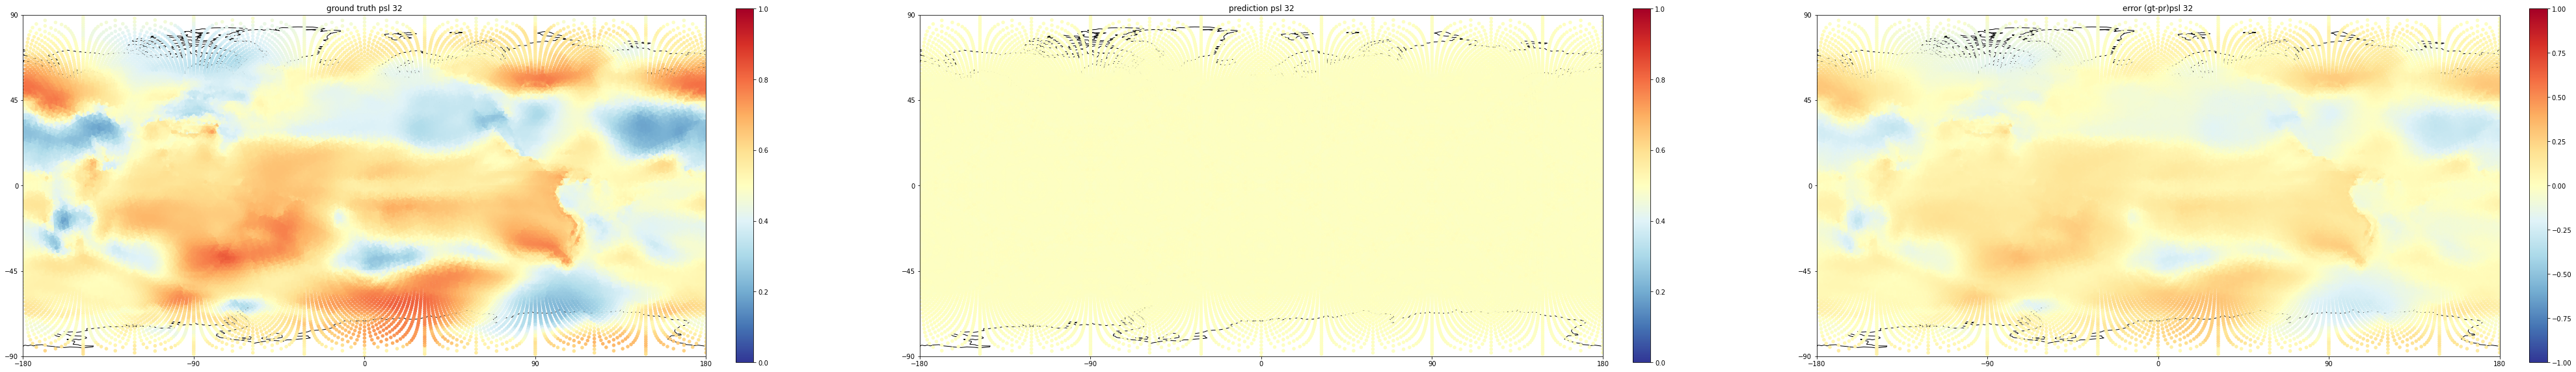

In [28]:
import os
os.mkdir("./saved_model_convlstm/fig/")
ch =['tas', 'psl', 'pr']

for i in range(98):
    visualize_2d_all(gt[i,:,0],pr[i,:,0], lon, lat, ch[1]+" "+str(i), export_path="./saved_model_convlstm/fig/"+ch[j]+"_"+str(i)+".png")
